In [34]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import skimage
from skimage import data
from skimage import transform

In [6]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory)
                  if os.path.isdir(os.path.join(data_directory,d))]
    images = []
    labels = []
    for d in directories:
        label_directory = os.path.join(data_directory,d)
        filenames = [os.path.join(label_directory,f)
                     for f in os.listdir(label_directory)
                     if f.endswith(".ppm")]
        for f in filenames:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images,labels

In [7]:
ROOT_PATH = "/media/avikpal/ff101cfc-d4c7-4024-a6e0-e7dee15336a2/Datasets/Belgium Traffic Sign Dataset/"
train_data_directory = os.path.join(ROOT_PATH, "Training")
test_data_directory = os.path.join(ROOT_PATH, "Testing")
print(ROOT_PATH)
print(train_data_directory)
print(test_data_directory)

/media/avikpal/ff101cfc-d4c7-4024-a6e0-e7dee15336a2/Datasets/Belgium Traffic Sign Dataset/
/media/avikpal/ff101cfc-d4c7-4024-a6e0-e7dee15336a2/Datasets/Belgium Traffic Sign Dataset/Training
/media/avikpal/ff101cfc-d4c7-4024-a6e0-e7dee15336a2/Datasets/Belgium Traffic Sign Dataset/Testing


In [8]:
images, labels = load_data(train_data_directory)
im_test, lab_test = load_data(test_data_directory)

In [19]:
print(np.shape(labels))
print(len(labels))
print(len(set(labels)))

(4575,)
4575
62


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([  15.,  110.,   13.,   15.,   15.,   11.,   18.,  157.,   27.,
          18.,   21.,    7.,   18.,   90.,   43.,    9.,    9.,   79.,
          81.,  231.,   42.,   43.,  375.,   15.,   48.,   42.,    6.,
          18.,  125.,   33.,   37.,   63.,  316.,   12.,   46.,   60.,
          18.,   98.,  285.,  196.,  242.,  148.,   35.,   30.,   48.,
          74.,   44.,  147.,   11.,   12.,   15.,   27.,   27.,  199.,
         118.,   12.,   95.,   78.,   15.,   42.,    9.,  282.]),
 array([  0.        ,   0.98387097,   1.96774194,   2.9516129 ,
          3.93548387,   4.91935484,   5.90322581,   6.88709677,
          7.87096774,   8.85483871,   9.83870968,  10.82258065,
         11.80645161,  12.79032258,  13.77419355,  14.75806452,
         15.74193548,  16.72580645,  17.70967742,  18.69354839,
         19.67741935,  20.66129032,  21.64516129,  22.62903226,
         23.61290323,  24.59677419,  25.58064516,  26.56451613,
         27.5483871 ,  28.53225806,  29.51612903,  30.5     

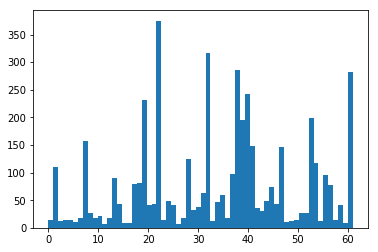

In [22]:
plt.hist(labels,62)

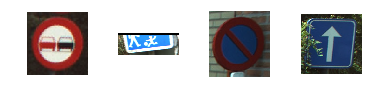

In [31]:
# Import the `pyplot` module of `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

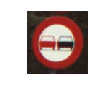

shape: (87, 84, 3), min: 12, max: 255


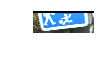

shape: (165, 457, 3), min: 0, max: 255


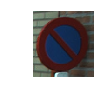

shape: (142, 131, 3), min: 5, max: 255


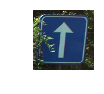

shape: (184, 188, 3), min: 0, max: 255


In [32]:
# Import `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

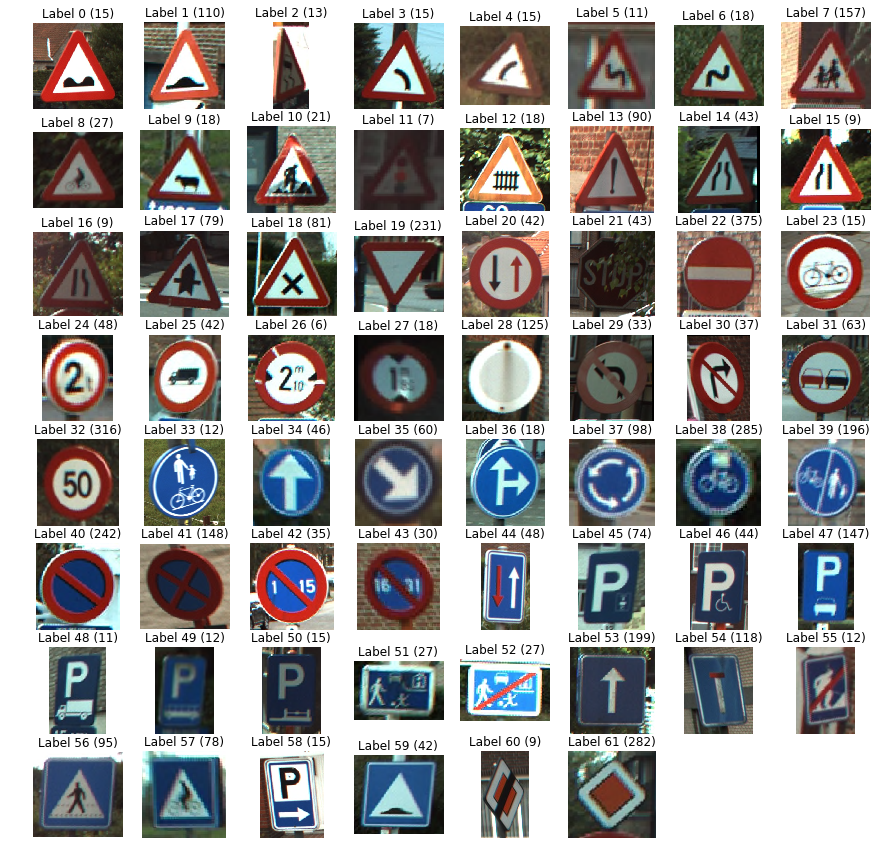

In [33]:
# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

In [35]:
image28 = [transform.resize(image,(28,28)) for image in images]

/home/avikpal/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [37]:
np.shape(image28)

(4575, 28, 28, 3)

In [38]:
from skimage.color import rgb2gray
image28 = np.array(image28)

In [39]:
image28 = rgb2gray(image28)

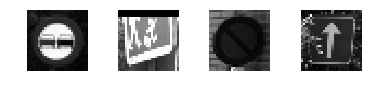

In [41]:
import matplotlib.pyplot as plt

traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(image28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [42]:
# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [43]:
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


In [45]:
tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: image28, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

EPOCH 0
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1
DONE WITH EPOCH
EPOCH 2
DONE WITH EPOCH
EPOCH 3
DONE WITH EPOCH
EPOCH 4
DONE WITH EPOCH
EPOCH 5
DONE WITH EPOCH
EPOCH 6
DONE WITH EPOCH
EPOCH 7
DONE WITH EPOCH
EPOCH 8
DONE WITH EPOCH
EPOCH 9
DONE WITH EPOCH
EPOCH 10
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 11
DONE WITH EPOCH
EPOCH 12
DONE WITH EPOCH
EPOCH 13
DONE WITH EPOCH
EPOCH 14
DONE WITH EPOCH
EPOCH 15
DONE WITH EPOCH
EPOCH 16
DONE WITH EPOCH
EPOCH 17
DONE WITH EPOCH
EPOCH 18
DONE WITH EPOCH
EPOCH 19
DONE WITH EPOCH
EPOCH 20
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 21
DONE WITH EPOCH
EPOCH 22
DONE WITH EPOCH
EPOCH 23
DONE WITH EPOCH
EPOCH 24
DONE WITH EPOCH
EPOCH 25
DONE WITH EPOCH
EPOCH 26
DONE WITH EPOCH
EPOCH 27
DONE WITH EPOCH
EPOCH 28
DONE WITH EPOCH
EPOCH 29
DONE WITH EPOCH
EPOCH 30
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 31
DONE WITH EPOCH
EPOCH 32
DONE 

[1, 41, 61, 22, 39, 61, 13, 7, 41, 28]
[ 7 40 61 22 39 61  7  7 41 28]


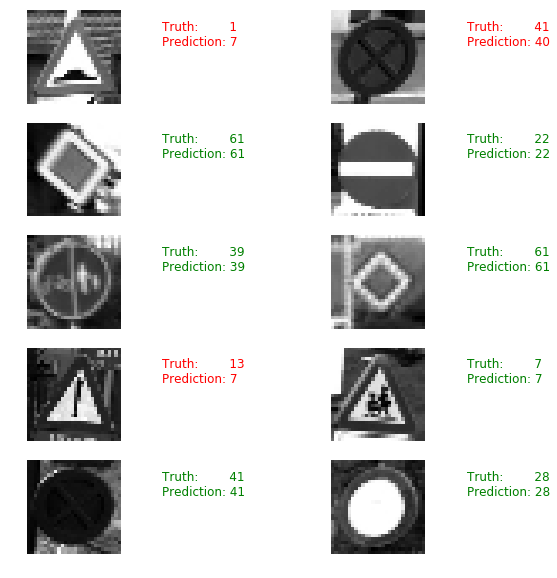

In [48]:
import random

# Pick 10 random images
sample_indexes = random.sample(range(len(image28)), 10)
sample_images = [image28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "correct_pred" operation
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()

In [49]:
# Load the test data
test_images, test_labels = load_data(test_data_directory)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

/home/avikpal/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Accuracy: 0.735
